My portion of the project was the section on fire incidents in Pittsburgh. I found a data set which had a very intuitive system of tracking fire related occurences in different neighborhoods of the city. Naturally, the areas that have the least amount of fires would be the ones that are considered "best" from a habitability and safety perspective so the ones with the least fires will receive the highest ratings in my portion of the project. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Above I import all the necessary libraries for this activity and below I import the data set I found regarding fire incidents. As can be seen this is a very broad selection of data with all kinds of values that are not relevant for my particular assessment including call_no, type_description, and alarm_time. Though these provide valuable information about the fires it is not relevant for my assessment. 

In [3]:
data = pd.read_csv("FireIncidents.csv", parse_dates=True)
data

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,11025,F230094352,100.0,"Fire, Other","300 BLOCK DARRAGH ST, PITTSBURGH PA",0,2023-11-05T17:58:09,231EN10,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-10,NaN,NaN
9536,11026,F230095402,118.0,"Trash or rubbish fire, contained","700 BLOCK 2ND AVE, PITTSBURGH PA",1,2023-11-08T23:03:53,231EN04,103.0,Bluff,6.0,1.0,4.200301e+10,6.0,1.0,2.0,2-4,40.435335,-79.994591
9537,11027,F230095564,132.0,Road freight or transport vehicle fire,"700 BLOCK I376 WB, PITTSBURGH PA",0,2023-11-09T12:18:32,231EN12,1413.0,NaN,6.0,NaN,4.200302e+10,NaN,NaN,NaN,NaN,40.439414,-80.010172
9538,11028,F230095111,111.0,Building fire,"4700 BLOCK INTERBORO AVE, PITTSBURGH PA",1,2023-11-08T06:25:29,231EN20,3102.0,Lincoln Place,5.0,31.0,4.200331e+10,3.0,31.0,4.0,4-20,40.376883,-79.909367


Below I use the .groupby command in order to sort the data by neighborhoods which is the factor we care about most. In this I sort all the rows of the table into their respective neighborhoods and get the count as can be seen in the chart below. 

In [4]:
data.groupby("neighborhood").count()

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,
Allegheny Center,62,62,61,62,62,62,61,62,61,62,62,62,62,62,62,62,59,59
Allegheny West,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,41,41
Allentown,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,121,121
Arlington,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Arlington Heights,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
West End,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
West Oakland,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


The next step is to get rid of the unnecessary data which I do in this step. This way we just get the number of fire occurrences in the various neighborhoods without all the excess information. 

In [5]:
chart = data["neighborhood"].value_counts().sort_values(ascending=False)
chart

Carrick                      283
Central Business District    266
South Side Flats             260
Squirrel Hill South          252
Hazelwood                    244
                            ... 
Ridgemont                     12
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

As can be seen here we have a list of all the neighborhoods in the data set and their respective amount of fires. However, here we have the largest amounts at the top which we do not want to focus on for this analysis because the neighborhoods with the least amount of fires will be the best. Therefor, we will take the .tail() of this data to get the 20 lowest count values, making these the safest neighborhoods that should be considered. 

In [6]:
bottom_20 = chart.tail(20)
print(bottom_20)

Spring Garden           24
Hays                    24
South Shore             23
Windgap                 23
Esplen                  22
West End                22
Bon Air                 22
New Homestead           21
Summer Hill             21
Glen Hazel              20
Chartiers City          17
Swisshelm Park          16
St. Clair               13
Arlington Heights       13
Oakwood                 13
Ridgemont               12
East Carnegie           11
Mt. Oliver              11
Regent Square            9
Mount Oliver Borough     6
Name: neighborhood, dtype: int64


The following section contains several charts displaying the fire incidents data in a variety of ways. I used bar graphs to show the comparative amount of occurrences between the different neighborhoods. I compare all of them in the top chart which can get confusing because of the shear amount of data here and then look at smaller data sets to get a better idea of the comparison between the safest neigh 

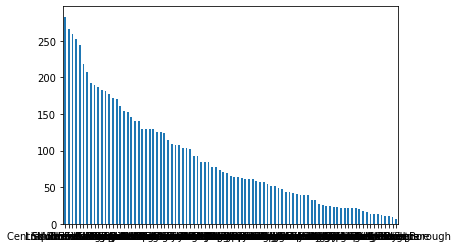

In [11]:
chart.plot.bar(rot = 0)

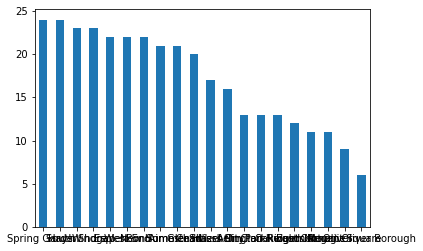

In [15]:

detailed = chart.tail(20)
detailed.plot.bar(rot = 0)

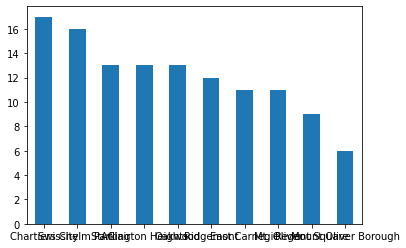

In [16]:
detailed = chart.tail(10)
detailed.plot.bar(rot = 0)

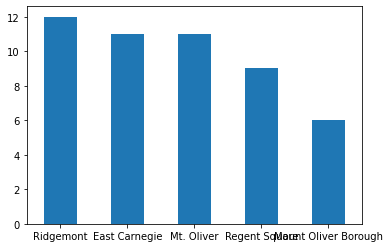

In [9]:
detailed = chart.tail(5)
detailed.plot.bar(rot = 0)